# Machine Learning


### Types of Machine Learning
* Supervised
  - Classification
  - Regression
* Unsupervised
  - Clustering
  - Dimension reduction
  - Data mining

#### Supervised

**Classification** include: binary classification ('spam' or 'not spam'), movie genre (action, drama, horror, etc.), digits (0,1,2,3,...9).  *KNN = k-nearest neighbors* is a simple classification algorithm.  


**Regression** models are used to **predict** *continuous* output.  For example, temperature or real estate prices.  

## DS Workflow

1. load data
2. explore data (EDA) with **pandas** and *visualization* (**seaborn**)
3. transform data
4. split data into training and testing
5. create model
6. train and test model
6. tune the model
7. make predictions

In [ ]:
import pandas as pd

## 1. Load data

In [ ]:
digits = pd.read_csv('sample_data/mnist_train_small.csv',header=None)

## 2. Explore data

In [ ]:
digits.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
digits.shape

(19999, 785)

### Subsets and Slices

In [ ]:
digits.iloc[0:2,1:5]

,1,2,3,4
0,0,0,0,0
1,0,0,0,0


In [ ]:
y_train = digits.iloc[:,0]
X_train = digits.iloc[:,1:]
print(y_train)

0        6
1        5
2        7
3        9
4        5
        ..
19995    0
19996    1
19997    2
19998    9
19999    5
Name: 0, Length: 20000, dtype: int64


In [ ]:
num = digits.iloc[2,1:].values.reshape((28,28))

### Visualize

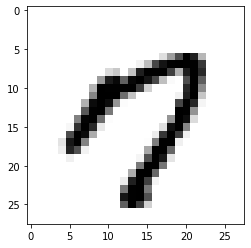

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(num, cmap=plt.cm.gray_r)

## 3. Transform data
- Deal with missing values
- Scale
- Feature engineer
- Transform categorical variables using 1HE

## 4. Split Data - Train/Test

## 5. Create Model

### Scikit-Learn

* Machine-Learning Library
* Black-box ML algorithms
* Use to create models, extract insights, make predictions
* Use to Train/Test models
* Easy to create and test many models

See:

https://scikit-learn.org/stable/index.html

https://www.tutorialspoint.com/scikit_learn/scikit_learn_kneighbors_classifier.htm

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create classifier object
knn = KNeighborsClassifier() 

## 6a. Train model

In [ ]:
knn.fit(X=X_train, y = y_train)

KNeighborsClassifier()

## 6b. Test model

In [ ]:
test = pd.read_csv('sample_data/mnist_test.csv', header = None)
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

In [ ]:
predicted = knn.predict(X=X_test)
expected = y_test

### Model Metrics and Accuracy

In [ ]:
right = [(p,e) for (p,e) in zip(predicted,expected) if p==e]
wrong = [(p,e) for (p,e) in zip(predicted,expected) if p!=e]

In [ ]:
print(f'{(len(right) - len(wrong))/len(y_test)}')
print(len(y_test))
print(len(right))
print(len(wrong))
print(len(right)-len(wrong))

0.9182
10000
9591
409
9182


In [ ]:
print(knn.score(X_test,y_test))

0.9591


In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true = expected, y_pred = predicted)

In [ ]:
confusion # aka hits and misses

array([[ 972,    1,    1,    0,    0,    2,    3,    1,    0,    0],
       [   0, 1131,    2,    0,    0,    0,    2,    0,    0,    0],
       [  12,   17,  968,    4,    1,    0,    4,   21,    5,    0],
       [   0,    3,    3,  974,    1,   12,    2,    9,    3,    3],
       [   0,   11,    1,    0,  920,    0,   11,    1,    1,   37],
       [   5,    2,    1,   16,    1,  853,    6,    2,    2,    4],
       [   8,    4,    0,    0,    2,    2,  942,    0,    0,    0],
       [   0,   28,    4,    0,    5,    1,    0,  975,    0,   15],
       [   5,    4,    5,   21,    6,   14,    4,    7,  902,    6],
       [   9,    6,    3,    9,   11,    1,    1,   12,    3,  954]])

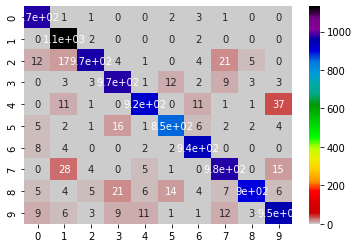

In [ ]:
import seaborn as sb
axes = sb.heatmap(confusion, annot = True, cmap='nipy_spectral_r')

# Spliting data into training and test sets

In [ ]:
# import data
# https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

import pandas as pd

In [ ]:
credit = pd.read_csv('creditcards.csv')

In [ ]:
# have a look
credit.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,1,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [ ]:
credit_dat = credit.iloc[:,1:]
credit_tar = credit.iloc[:,0]

In [ ]:
credit_dat.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


Do you know your data?  What about categorical data?  Missing data?

* For missing data, consider: 
```
isnull()
notnull()
dropna()
fillna()
replace()
interpolate()
```

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    credit_dat, 
    credit_tar, 
    random_state = 123, 
    test_size = 0.2, 
    shuffle = True)

In [ ]:
X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
25665,40000,2,2,2,26,-1,0,0,0,-1,...,13600,0,44024,18697,1300,1000,0,22373,680,10000
16464,80000,2,3,1,59,0,0,0,0,0,...,53169,50875,50372,49470,3212,2106,2000,1603,1903,2006
22386,170000,2,1,2,30,2,2,2,2,2,...,161487,157577,168094,170922,6800,6500,0,13000,5500,1000
10149,200000,2,2,1,41,-2,-2,-2,-2,-2,...,0,0,0,0,742,0,0,0,0,0
8729,50000,1,2,1,43,0,0,0,0,0,...,9044,9225,9417,9617,1140,1150,331,341,356,330


In [ ]:
# create the model type (object)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
# Train the model
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [ ]:
# Test model
cred_predict = knn.predict(X=X_test)

In [ ]:
# Score Model
knn.score(X_test, y_test)

0.759

In [ ]:
# Report
from sklearn.metrics import classification_report
print(classification_report(y_test, cred_predict))

# Precision = # Correct Predictions / # Predictions Made 
#           = c(i,i) / sum(:,i)

# Recall = c(i,i) / sum(c(i,:))
# f1 = avg(precision, recall)
# Support (count) = # samples labeled 0 or 1

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      4696
           1       0.38      0.17      0.24      1304

    accuracy                           0.76      6000
   macro avg       0.59      0.55      0.55      6000
weighted avg       0.71      0.76      0.72      6000



In [ ]:
# Spot check some numbers
4696+1304
len(y_test)

6000

# K-fold Cross-Validation
Use all data as training and testing (at various times)

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state = 123, shuffle=True)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=knn, X=credit_dat, y=credit_tar, cv=kfold)

In [ ]:
scores

array([0.75566667, 0.76466667, 0.76133333, 0.75433333, 0.75533333,
       0.76333333, 0.742     , 0.752     , 0.75533333, 0.74766667])

In [ ]:
# U,S,V = np.linalg.svd(A)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x = pca.fit_transform(credit_dat)

In [ ]:
x

array([[-166488.19108562,  -75538.15366411],
       [-114226.97681649,    9780.67125066],
       [ -98432.36218047,  -33471.38733061],
       ...,
       [-140206.12804804,  -77857.4965395 ],
       [ -41427.74077368,  -74908.30367175],
       [ -70860.3112088 ,  -95514.14430929]])

In [ ]:
pca.components_.T[:,0]

array([ 4.91590659e-01, -3.52873014e-08, -3.67290605e-07, -1.92469255e-07,
        5.56879962e-06,  3.42455214e-07,  5.68458344e-07,  5.81779941e-07,
        6.64584131e-07,  7.59373260e-07,  8.36871693e-07,  3.88453549e-01,
        3.81356126e-01,  3.72179448e-01,  3.46397504e-01,  3.22920046e-01,
        3.08577267e-01,  2.65676097e-02,  3.12865310e-02,  2.68185282e-02,
        2.21681253e-02,  2.22044122e-02,  2.48098976e-02])

# Model Selection
Which model is best?  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
# repeat from above
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
estimators = {'KNN':KNeighborsClassifier(), 
              'SVM':SVC(gamma='scale'), 
              'GNB':GaussianNB()}

In [ ]:
# Loop over models
for x,y in estimators.items():
  kfold = KFold(n_splits=10, random_state = 123, shuffle = True)
  scores = cross_val_score(estimator = y, X=credit_dat, y=credit_tar, cv=kfold)
  print(f'Model: {x:>20},  Mean =  {scores.mean()} and sd = {scores.std()}')

Model:                  KNN,  Mean =  0.7551666666666667 and sd = 0.006600084174547405
Model:                  SVM,  Mean =  0.7788 and sd = 0.006640281118547115
Model:                  GNB,  Mean =  0.37886666666666663 and sd = 0.008182909018191506


---

## Book's Version

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
# Explore Data set
# type shows its a "Bunch"
type(digits)


sklearn.utils.Bunch

A Bunch object has *data* and *target* properites that are NumPy arrays.  To view all metadata about a Bunch, use DESCR function.

In [ ]:
print(digits.DESCR)  # show the dataset description

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

AttributeError: ignored

In [ ]:
# .target = the label (or response) of what the digit is 0, 1, 2, 3, ...
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [ ]:
# Shape of the data # rows and # columns
# (rows, columns) 
# rows = number of data points
# columns = features or attributes of each data point
digits.data.shape

(1797, 64)

In [ ]:
# Compare number of data points with number of target values
digits.target.shape

(1797,)

In [ ]:
# The Bunch object has an image
# Look at one images pixel values in 2-D array
# Entries are intensities 0 - 16 (0 = white, 16 = black)
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [ ]:
# 2-D arrays in Python are row-based
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [ ]:
# Recap: digits have images, target, and data
digits.images[22]
digits.target[22]
digits.data[22]

array([[ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 13., 11., 16.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  1., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0., 14., 15.,  8.,  8.,  3.,  0.],
       [ 0.,  0.,  7., 12., 12., 12., 13.,  1.]])

---

## Visualizing the Data

Visualization is part of Exploratory Data Analysis (EDA).

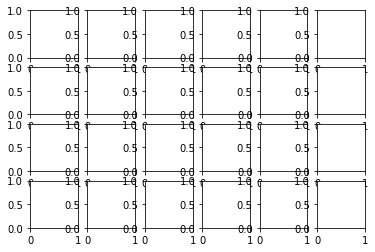

In [ ]:
from matplotlib import figure
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=4,ncols=6,figsize=(6,4))

Display images and remove axes labels.

In [ ]:
# Recall ZIP allows iterating over multiple iterables of data at the same time.  
# For example, 
name = ['a','b','c'] 
values = [1,2,3]
for i, j in zip(name, values):
  print(f'Name = {i} and Value = {j}')


Name = a and Value = 1
Name = b and Value = 2
Name = c and Value = 3


In [ ]:
axes.ravel()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc387aa3dd0>,
      dtype=object)

In [ ]:
for item in zip(axes.ravel(),digits.images, digits.target):
  axes, image, target = item      # unpack item tuple
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([]) # remove x-axis tick marks
  axes.set_yticks([]) # remove y-axis tick marks
  axes.set_title(target)
plt.tight_layout()


<Figure size 432x288 with 0 Axes>

In [ ]:
axes.imshow(digits.images[13])

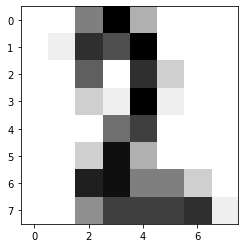

In [ ]:
axes = plt.subplot()
image = plt.imshow(digits.images[22], cmap = plt.cm.gray_r)


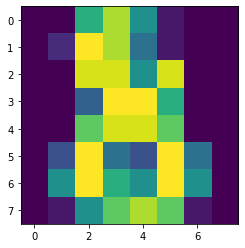

In [ ]:
# for i in digits.images:
  # plt.imshow(i, cmap = plt.cm.gray_r))

---

## Splitting Data: Train and Test

In [ ]:
# load function that splits data
from sklearn.model_selection import train_test_split

In [ ]:
# random_state = seed value for reproducibility
# default test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, 
    digits.target, 
    random_state=11, 
    test_size = 0.20)

In [ ]:
type(X_test)

X_test.shape

(450, 64)

In [ ]:
X_test[3,:]

array([ 0.,  0.,  3., 11., 13.,  5.,  0.,  0.,  0.,  0., 10., 12.,  5.,
       16.,  0.,  0.,  0.,  0.,  7., 10.,  6., 15.,  4.,  0.,  0.,  0.,
        2., 13., 16., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,
        0.,  0.,  0.,  0.,  0.,  0.,  4., 11.,  0.,  0.,  0.,  9.,  7.,
        0.,  8., 11.,  0.,  0.,  0.,  3.,  9., 16., 16.,  6.,  0.])

## Select the model type, then train it

Based on the data, the model (from the KNN class) will select the best model
parameters.

> Note: We are trying to **classify** digits using supervised learning.  We use the data we have to train and test the model.  If performance is good on the test set, we can be confident our model can be used to classify future digits that we have not received yet.

In [ ]:
# Select model to use, then train it
from sklearn.neighbors import KNeighborsClassifier # is a Class

In [ ]:
knn = KNeighborsClassifier() # instantiate an object

#### Training the knn Model

In [ ]:
knn.fit(X = X_train, y = y_train)  # the fit method

KNeighborsClassifier()

In [ ]:
# Some properties of knn object

knn.metric          # distance metric
knn.algorithm       # which algo
knn.n_neighbors     # = k (neighbors)
knn.weights
knn.p
knn.leaf_size

30

---

# Regression

* Goal is to predict continuous value (e.g., housing price) from a set of factors.

### Workflow

0. Import Libraries
1. Read data
2. Explore data (EDA)
3. Clean data (goto 2)
4. Split data
5. Train model
6. Test model

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [ ]:
# Read (and split) data
cali_train = pd.read_csv('sample_data/california_housing_train.csv')
cali_test = pd.read_csv('sample_data/california_housing_test.csv')

### EDA

> **Do not look at test set**

In [ ]:
cali_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# Note: To change a column name
# df.rename(columns={"OldName":"NewName"})

### Summary Statistics (part of EDA)

In [ ]:
cali_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
cali_train.isnull()

In [ ]:
cali_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
cali_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,0.396497
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,0.239141
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,0.215259
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,0.341032
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,0.515464
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,1.000000


In [ ]:
scaler = MinMaxScaler()
cali_train[['median_house_value']] = scaler.fit_transform(cali_train[['median_house_value']])

In [ ]:
scaler = MinMaxScaler()
cali_test[['median_house_value']] = scaler.fit_transform(cali_test[['median_house_value']])

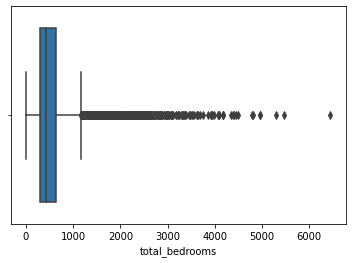

In [ ]:
sb.boxplot(x=cali_train['total_bedrooms'])

In [ ]:
z=np.abs(stats.zscore(cali_train['total_bedrooms']))
print(np.where(z > 3))


(array([    1,   133,   135,   168,   175,   186,   187,   191,   192,
         197,   198,   199,   201,   203,   210,   229,   232,   235,
         237,   242,   249,   253,   254,   293,   300,   355,   389,
         399,   400,   401,   403,   415,   420,   463,   493,   495,
         496,   522,   544,   643,   657,   691,   748,   816,   870,
         884,   885,   888,  1003,  1005,  1116,  1263,  1293,  1321,
        1325,  1352,  1408,  1444,  1514,  1548,  1557,  1560,  1605,
        1606,  1612,  1721,  1722,  1836,  1838,  1920,  1923,  1958,
        1990,  2001,  2045,  2066,  2073,  2081,  2086,  2104,  2132,
        2137,  2200,  2220,  2268,  2274,  2289,  2313,  2320,  2330,
        2353,  2371,  2372,  2386,  2428,  2434,  2462,  2464,  2652,
        2653,  2762,  2778,  2779,  2791,  2821,  2871,  2881,  2897,
        2909,  2962,  2969,  2995,  3058,  3128,  3130,  3131,  3238,
        3296,  3359,  3401,  3489,  3490,  3493,  3600,  3640,  3698,
        3854,  4577

---

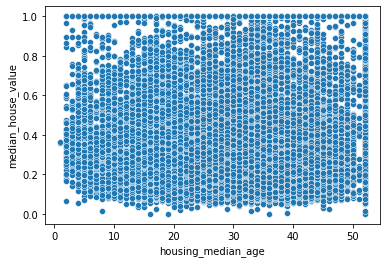

In [ ]:
sb.scatterplot(x=cali_train["housing_median_age"],y=cali_train['median_house_value'])

In [ ]:
plt.figure(figsize=(16,9))
sb.scatterplot(x=cali_train["total_rooms"],y=cali_train['median_house_value'])

In [ ]:
plt.figure(figsize=(16,9))
sb.scatterplot(data = cali_train, 
               x='population', 
               y='median_house_value', 
               palette = 'cool', 
               hue='median_house_value')

In [ ]:
plt.figure(figsize=(16,9))
sb.scatterplot(data = cali_train, 
               x='median_income', 
               y='median_house_value', 
               palette = 'cool', 
               hue='median_house_value')

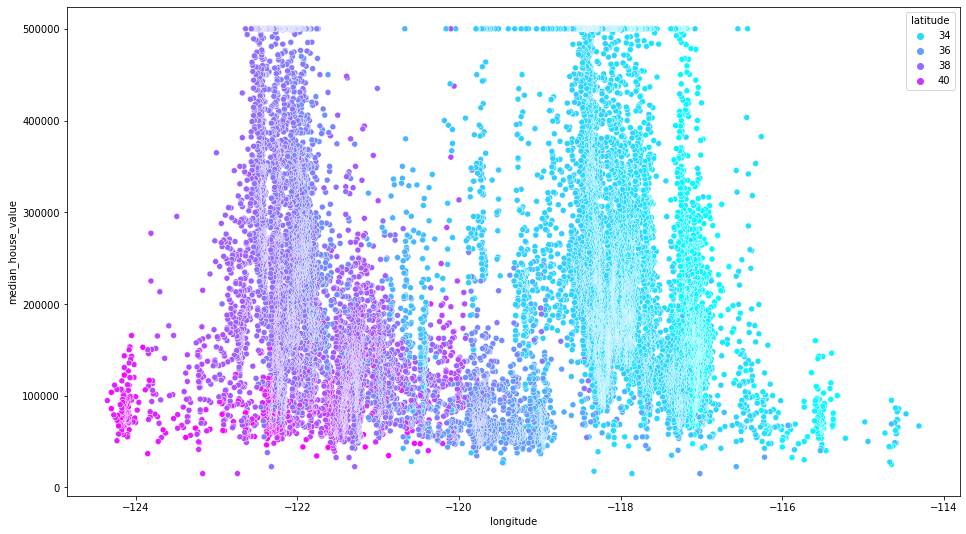

In [ ]:
plt.figure(figsize=(16,9))
sb.scatterplot(data = cali_train, 
               x='longitude', 
               y='median_house_value', 
               palette = 'cool', 
               hue='latitude')

In [ ]:
# ID Training and Test
X_train = cali_train.iloc[:,0:8]
y_train = cali_train.iloc[:,8]

X_test = cali_train.iloc[:,0:8] # WATCH INDICES!!!!!
y_test = cali_train.iloc[:,8]

In [ ]:
# Verfiy
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [ ]:
y_train.head()

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64

In [ ]:
# Select and fit model
model = LinearRegression()
model.fit(X = X_train, y = y_train)

LinearRegression()

In [ ]:
# What are the parameters?
for i in range(0,8):
  print(f'{X_train.columns[i]:>20}: {model.coef_[i]}')

           longitude: -0.08894733889259372
            latitude: -0.08850617747620369
  housing_median_age: 0.0023725570873410007
         total_rooms: -1.7274673533691776e-05
      total_bedrooms: 0.0002425733148360039
          population: -7.935796573202425e-05
          households: 9.368209317127223e-05
       median_income: 0.0835193841662456


In [ ]:
# Test model
pred = model.predict(X_test)

In [ ]:
# Set up table
results = pd.DataFrame()
results['Expected'] = y_test
results['Predicted'] = pred
results.head()

,Expected,Predicted
0,0.107012,-0.016229
1,0.134228,0.120982
2,0.145775,-0.095497
3,0.120414,0.053203
4,0.104125,-0.039294


In [ ]:
results['Predicted'].min()

-1.4055521513124827

In [ ]:
# Visualize results
start = min(results['Expected'].min(), results['Predicted'].min())
end = max(results['Expected'].max(), results['Predicted'].max())
(start, end)

(-1.4055521513124827, 1.4306877129534286)

In [ ]:
# results['Predicted']==results['Predicted'].min()
df = results['Predicted']
for i in enumerate(results['Predicted']):
  if (df.iloc[i]==results['Predicted'].min()):
    print(i)

IndexingError: ignored

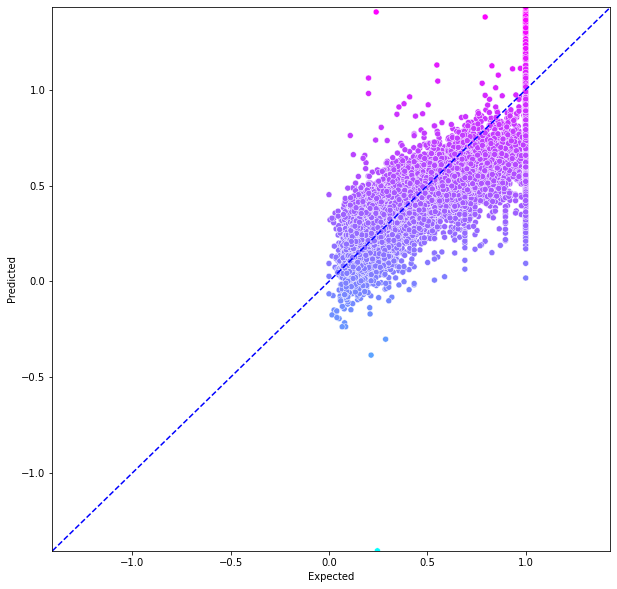

In [ ]:
figure = plt.figure(figsize=(10,10))
axes = sb.scatterplot(data = results, x = 'Expected', y = 'Predicted',
                      hue = 'Predicted', 
                      palette = 'cool',
                      legend = False)
axes.set_xlim(start, end)
axes.set_ylim(start, end)
line = plt.plot([start, end], [start,end],'b--')

## Model Metrics

In [ ]:
metrics.r2_score(results['Expected'],results['Predicted'])

0.6413378529502689

In [ ]:
metrics.mean_squared_error(results['Expected'],results['Predicted'])

0.020510079219008073

## Run ridge, lasso, e-net using Kfold CV

*   Choose best model

In [ ]:
import pandas as pd               # data wrangling/organization
import numpy as np                # numerical arrays (linear algebra)
from scipy import stats         
import matplotlib.pyplot as plt  # viz
import seaborn as sb             # viz


from sklearn.model_selection import train_test_split # split into training/testing
from sklearn.preprocessing import MinMaxScaler # standardize data
from sklearn import metrics   # judge quality of model

# Import models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import KFold, cross_val_score


In [ ]:
# Creates a dictionary containing 4 models
estimators = {'LinearRegression':LinearRegression(), 
              'Ridge':Ridge(),
              'Lasso':Lasso(),
              'ElasticNet':ElasticNet()}

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
california = fetch_california_housing()

In [ ]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
california.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state= 123)

array([1.516, 0.992, 1.345, ..., 1.096, 0.379, 1.554])

In [ ]:
for ename, eobj in estimators.items():
  kfold = KFold(n_splits=10, random_state=123, shuffle=True)
  scores = cross_val_score(estimator = eobj, X=california.data, y=california.target, cv=kfold, scoring='r2')
  print(f'{ename:>16}: Mean R^2 = {scores.mean():.3f}')

LinearRegression: Mean R^2 = 0.603
           Ridge: Mean R^2 = 0.603
           Lasso: Mean R^2 = 0.284
      ElasticNet: Mean R^2 = 0.422


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics